In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, max, min, count, desc


spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()


batsman_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Batsman.csv", header=True, inferSchema=True)
bowler_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Bowler.csv", header=True, inferSchema=True)
scoreboard_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Match_Scoreboard.csv", header=True, inferSchema=True)
matches_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Matches.csv", header=True, inferSchema=True)

#
batsman_df.printSchema()
batsman_df.show(5)

bowler_df.printSchema()
bowler_df.show(5)

scoreboard_df.printSchema()
scoreboard_df.show(5)

matches_df.printSchema()
matches_df.show(5)


root
 |-- match_no: integer (nullable = true)
 |-- Batsman: string (nullable = true)
 |-- team: string (nullable = true)
 |-- Run: integer (nullable = true)
 |-- Ball: integer (nullable = true)
 |-- 4s: integer (nullable = true)
 |-- 6s: integer (nullable = true)
 |-- out_by: string (nullable = true)

+--------+---------------+-------------------+---+----+---+---+--------------+
|match_no|        Batsman|               team|Run|Ball| 4s| 6s|        out_by|
+--------+---------------+-------------------+---+----+---+---+--------------+
|       1|   Devon Conway|Chennai Super Kings|  1|   6|  0|  0|Mohammed Shami|
|       1|Ruturaj Gaikwad|Chennai Super Kings| 92|  50|  4|  9|Alzarri Joseph|
|       1|      Moeen Ali|Chennai Super Kings| 23|  17|  4|  1|   Rashid Khan|
|       1|     Ben Stokes|Chennai Super Kings|  7|   6|  1|  0|   Rashid Khan|
|       1|  Ambati Rayudu|Chennai Super Kings| 12|  12|  0|  1| Joshua Little|
+--------+---------------+-------------------+---+----+---+---+--

In [0]:
print(f"Batsman records: {batsman_df.count()}")
print(f"Bowler records: {bowler_df.count()}")
print(f"Scoreboard records: {scoreboard_df.count()}")
print(f"Matches records: {matches_df.count()}")


Batsman records: 1114
Bowler records: 853
Scoreboard records: 70
Matches records: 70


In [0]:
from pyspark.sql.functions import sum, desc

top_batsmen = (
    batsman_df
    .groupBy("Batsman") 
    .agg(sum("Run").alias("Total_Runs"))  
    .orderBy(desc("Total_Runs"))
)

top_batsmen.show(10)





+----------------+----------+
|         Batsman|Total_Runs|
+----------------+----------+
|  Faf du Plessis|       730|
|    Shubman Gill|       680|
|     Virat Kohli|       639|
|Yashasvi Jaiswal|       625|
| Ruturaj Gaikwad|       581|
|    David Warner|       516|
|Suryakumar Yadav|       511|
|    Devon Conway|       508|
|     Rinku Singh|       474|
|Heinrich Klaasen|       448|
+----------------+----------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import sum, desc

top_bowlers = (
    bowler_df
    .groupBy("Bowler")  
    .agg(sum("wicket").alias("Total_Wickets"))  
    .orderBy(desc("Total_Wickets"))
)

top_bowlers.show(10)



+-------------------+-------------+
|             Bowler|Total_Wickets|
+-------------------+-------------+
|        Rashid Khan|           25|
|     Mohammed Shami|           24|
|   Yuzvendra Chahal|           21|
|Varun Chakaravarthy|           20|
|   Tushar Deshpande|           20|
|      Piyush Chawla|           20|
|     Mohammed Siraj|           19|
|     Arshdeep Singh|           17|
|  Bhuvneshwar Kumar|           16|
|       Ravi Bishnoi|           16|
+-------------------+-------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import avg, sum


total_runs_per_match = (
    scoreboard_df
    .groupBy("match_no")
    .agg((sum("Home_team_run") + sum("Away_team_run")).alias("Total_Runs"))
)


avg_score_per_match = total_runs_per_match.agg(avg("Total_Runs").alias("Avg_Total_Runs"))


avg_score_per_match.show()



+------------------+
|    Avg_Total_Runs|
+------------------+
|346.95714285714286|
+------------------+



In [0]:
from pyspark.sql.functions import col, desc


scoreboard_df = scoreboard_df.withColumn("Total_Runs", col("Home_team_run") + col("Away_team_run"))


highest_home_score = scoreboard_df.select("match_no", "Home_team_run", "Total_Runs").orderBy(desc("Home_team_run")).limit(1)
highest_away_score = scoreboard_df.select("match_no", "Away_team_run", "Total_Runs").orderBy(desc("Away_team_run")).limit(1)


highest_score = highest_home_score.union(highest_away_score)


lowest_home_score = scoreboard_df.select("match_no", "Home_team_run", "Total_Runs").orderBy("Home_team_run").limit(1)
lowest_away_score = scoreboard_df.select("match_no", "Away_team_run", "Total_Runs").orderBy("Away_team_run").limit(1)


lowest_score = lowest_home_score.union(lowest_away_score)


print("Highest Score:")
highest_score.show()

print("Lowest Score:")
lowest_score.show()


Highest Score:
+--------+-------------+----------+
|match_no|Home_team_run|Total_Runs|
+--------+-------------+----------+
|      51|          227|       398|
|      38|          257|       458|
+--------+-------------+----------+

Lowest Score:
+--------+-------------+----------+
|match_no|Home_team_run|Total_Runs|
+--------+-------------+----------+
|      60|           59|       230|
|      45|            0|       125|
+--------+-------------+----------+



In [0]:
display(dbutils.fs.ls("/FileStore/tables/"))


path,name,size,modificationTime
dbfs:/FileStore/tables/Customer_Updated.csv,Customer_Updated.csv,153,1740405695000
dbfs:/FileStore/tables/IPL2023_Batsman-1.csv,IPL2023_Batsman-1.csv,64925,1741968641000
dbfs:/FileStore/tables/IPL2023_Batsman-2.csv,IPL2023_Batsman-2.csv,64925,1741968964000
dbfs:/FileStore/tables/IPL2023_Batsman-3.csv,IPL2023_Batsman-3.csv,64925,1742020358000
dbfs:/FileStore/tables/IPL2023_Batsman.csv,IPL2023_Batsman.csv,64925,1741967978000
dbfs:/FileStore/tables/IPL2023_Bowler-1.csv,IPL2023_Bowler-1.csv,42273,1741968655000
dbfs:/FileStore/tables/IPL2023_Bowler-2.csv,IPL2023_Bowler-2.csv,42273,1741968853000
dbfs:/FileStore/tables/IPL2023_Bowler.csv,IPL2023_Bowler.csv,42273,1741967967000
dbfs:/FileStore/tables/IPL2023_Match_Scoreboard-1.csv,IPL2023_Match_Scoreboard-1.csv,1706,1741968677000
dbfs:/FileStore/tables/IPL2023_Match_Scoreboard.csv,IPL2023_Match_Scoreboard.csv,1706,1741967923000


In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()


batsman_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Batsman.csv", header=True, inferSchema=True)


batsman_df.show(5)


+--------+---------------+-------------------+---+----+---+---+--------------+
|match_no|        Batsman|               team|Run|Ball| 4s| 6s|        out_by|
+--------+---------------+-------------------+---+----+---+---+--------------+
|       1|   Devon Conway|Chennai Super Kings|  1|   6|  0|  0|Mohammed Shami|
|       1|Ruturaj Gaikwad|Chennai Super Kings| 92|  50|  4|  9|Alzarri Joseph|
|       1|      Moeen Ali|Chennai Super Kings| 23|  17|  4|  1|   Rashid Khan|
|       1|     Ben Stokes|Chennai Super Kings|  7|   6|  1|  0|   Rashid Khan|
|       1|  Ambati Rayudu|Chennai Super Kings| 12|  12|  0|  1| Joshua Little|
+--------+---------------+-------------------+---+----+---+---+--------------+
only showing top 5 rows



In [0]:
batsman_df.printSchema()


root
 |-- match_no: integer (nullable = true)
 |-- Batsman: string (nullable = true)
 |-- team: string (nullable = true)
 |-- Run: integer (nullable = true)
 |-- Ball: integer (nullable = true)
 |-- 4s: integer (nullable = true)
 |-- 6s: integer (nullable = true)
 |-- out_by: string (nullable = true)



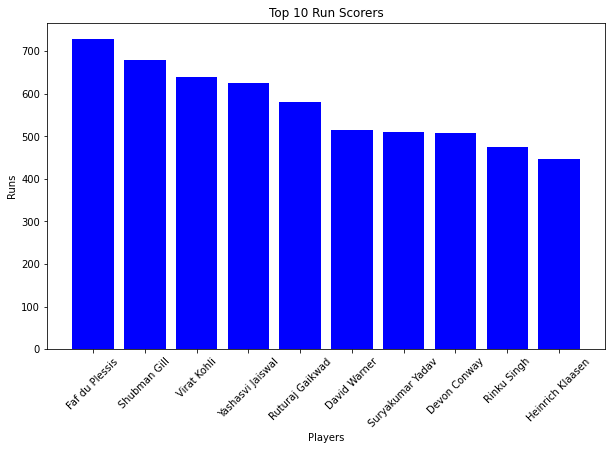

In [0]:
from pyspark.sql.functions import col, sum, desc
import matplotlib.pyplot as plt
import pandas as pd


top_batsmen = (
    batsman_df.groupBy("Batsman")  
    .agg(sum("Run").alias("Total_Runs"))  
    .orderBy(desc("Total_Runs"))
)


top_batsmen_pd = top_batsmen.limit(10).toPandas()


plt.figure(figsize=(10, 6))
plt.bar(top_batsmen_pd["Batsman"], top_batsmen_pd["Total_Runs"], color="blue")
plt.xticks(rotation=45)
plt.xlabel("Players")
plt.ylabel("Runs")
plt.title("Top 10 Run Scorers")
plt.show()


root
 |-- match_no: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- date_of_match: date (nullable = true)
 |-- venue: string (nullable = true)
 |-- Home_team: string (nullable = true)
 |-- Away_team: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- man_of_the_match: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: integer (nullable = true)
 |-- eliminator: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)



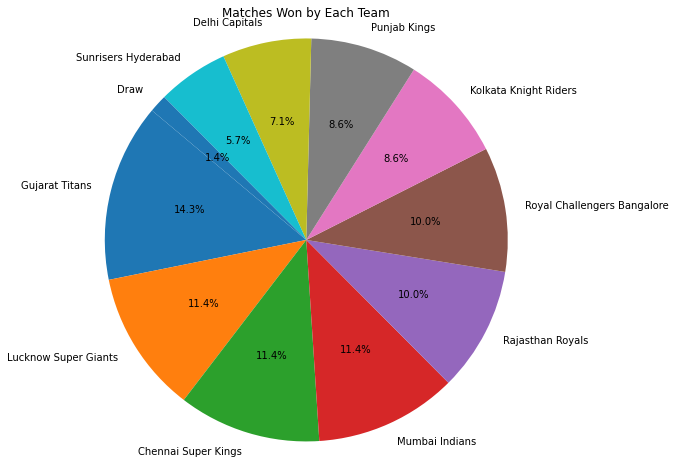

In [0]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc
import matplotlib.pyplot as plt


spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()


matches_df = spark.read.csv("dbfs:/FileStore/tables/IPL2023_Matches.csv", header=True, inferSchema=True)


matches_df.printSchema()


matches_won = (
    matches_df.groupBy("Winner")  
    .agg(count("*").alias("count"))
    .orderBy(desc("count"))
)


matches_won_pd = matches_won.toPandas()


plt.figure(figsize=(8, 8))
plt.pie(
    matches_won_pd["count"], 
    labels=matches_won_pd["Winner"], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Matches Won by Each Team")
plt.axis('equal')  
plt.show()
